# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## 1. Load The Data

In [21]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file   = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file    = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

print("Loading done!")

Loading done!


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

## 2. Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [22]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# Number of validation examples
n_valid = len(X_valid)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## 3. Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

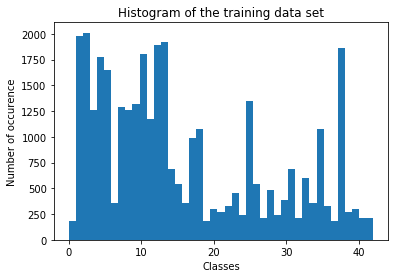

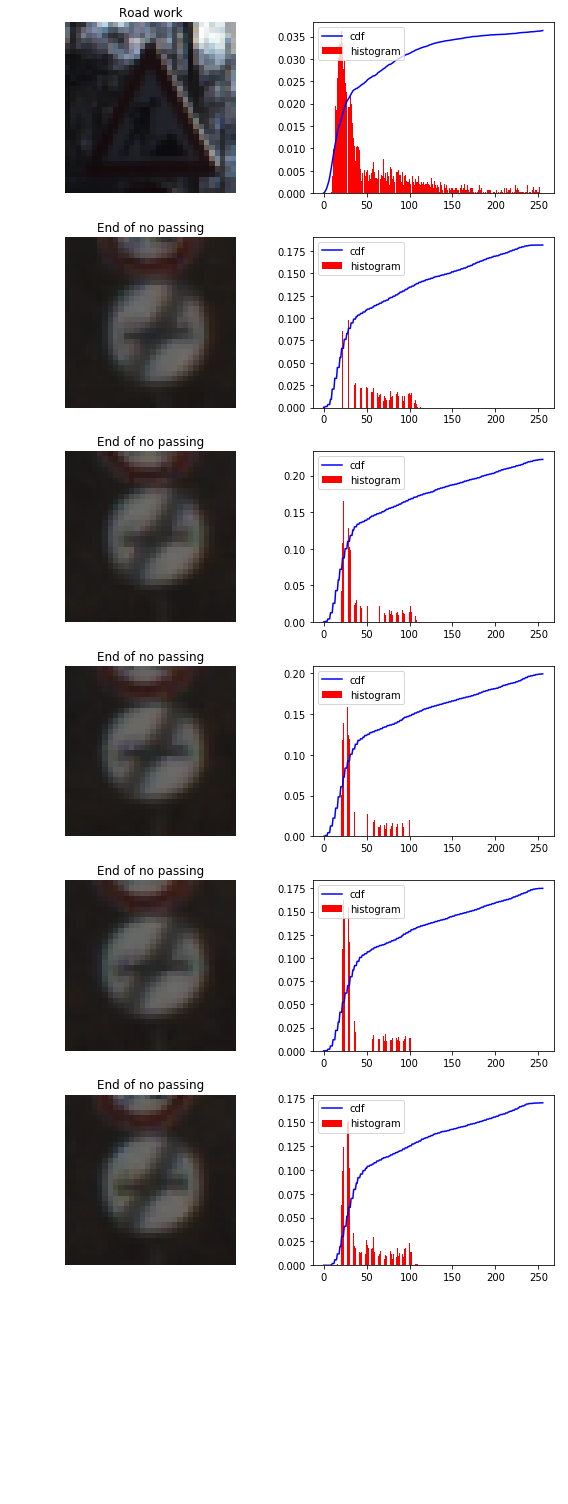

In [23]:
import matplotlib.pyplot as plt
import random
import numpy as np
import csv
import pandas as pd

# Visualizations will be shown in the notebook.
%matplotlib inline

def show_sample(features, labels, histogram = 1, sample_num = 1, sample_index = -1, color_map ='brg'):
    
    if histogram == 1 :
        col_num = 2
        #Create training sample + histogram plot
        f, axarr = plt.subplots(sample_num+1, col_num, figsize=(col_num*4,(sample_num+1)*3))
    else:
        if sample_num <= 4:
            col_num = sample_num
        else:
            col_num = 4
        
        if sample_num%col_num == 0:
            row_num = int(sample_num/col_num)
        else:
            row_num = int(sample_num/col_num)+1
        if sample_num == 1:
            #Create training sample plot
            f, ax = plt.subplots(row_num, col_num)
        else:
            #Create training sample plot
            f, axarr = plt.subplots(row_num, col_num, figsize=(col_num*4,(row_num+1)*2))
        
    signnames = pd.read_csv('signnames.csv')
    
    index = sample_index - 1 
    for i in range(0, sample_num, 1):
        if sample_index < -1:
            index = random.randint(0, len(features))
        else:
            index = index + 1
        
        if histogram == 1 :
            image = features[index].squeeze()
            axarr[i,0].set_title('%s' % signnames.iloc[labels[index], 1])
            axarr[i,0].imshow(image,color_map)

            hist,bins = np.histogram(image.flatten(),256, normed =1 )

            cdf = hist.cumsum()
            cdf_normalized = cdf * hist.max()/ cdf.max()

            axarr[i,1].plot(cdf_normalized, color = 'b')
            axarr[i,1].hist(image.flatten(),256, normed =1, color = 'r')
            axarr[i,1].legend(('cdf','histogram'), loc = 'upper left')

            axarr[i,0].axis('off')
            axarr[sample_num,0].axis('off')
            axarr[sample_num,1].axis('off')
        else:
            image = features[index].squeeze()
            if row_num > 1:
                axarr[int(i/col_num),i%col_num].set_title('%s' % signnames.iloc[labels[index], 1])
                axarr[int(i/col_num),i%col_num].imshow(image,color_map)
                axarr[int(i/col_num),i%col_num].axis('off')
                axarr[int(i/col_num),i%col_num].axis('off')
                axarr[int(i/col_num),i%col_num].axis('off')
            elif sample_num == 1:
                ax.set_title('%s' % signnames.iloc[labels[index], 1])
                ax.imshow(image,color_map)
                ax.axis('off')
                ax.axis('off')
                ax.axis('off')
            else: 
                axarr[i%col_num].set_title('%s' % signnames.iloc[labels[index], 1])
                axarr[i%col_num].imshow(image,color_map)
                axarr[i%col_num].axis('off')
                axarr[i%col_num].axis('off')
                axarr[i%col_num].axis('off')

    # Tweak spacing to prevent clipping of title labels
    f.tight_layout()
    plt.show()

def show_training_dataset_histogram(features):
    fig, ax = plt.subplots()
    
    n_classes = np.unique(y_train).size
    
    # the histogram of the training data
    n, bins, patches = ax.hist(features, n_classes)

    ax.set_xlabel('Classes')
    ax.set_ylabel('Number of occurence')
    ax.set_title(r'Histogram of the training data set')

    plt.show()

show_training_dataset_histogram(y_train)
show_sample(X_train, y_train, sample_num = 6)



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

## 4. Augment the Data Set

In [24]:
import cv2
from tqdm import tqdm
from sklearn.utils import shuffle

def random_transform_image(dataset, index):
    
    # Hyperparameters
    # Values inspired from Pierre Sermanet and Yann LeCun Paper : Traffic Sign Recognition with Multi-Scale Convolutional Networks
    Scale_change_max = 0.1
    Translation_max  =  2  #pixels
    Rotation_max     = 15  #degrees
    Brightness_max   = 0.1
    
    # Generate random transformation values
    trans_x = np.random.uniform(-Translation_max,Translation_max)
    trans_y = np.random.uniform(-Translation_max,Translation_max)
    angle   = np.random.uniform(-Rotation_max,Rotation_max)
    scale   = np.random.uniform(1-Scale_change_max,1+Scale_change_max)
    bright  = np.random.uniform(-Brightness_max,Brightness_max)

    #Brightness
    #create white image
    white_img = 255*np.ones((32,32,3), np.uint8)
    black_img = np.zeros((32,32,3), np.uint8)
    
    if bright >= 0:
        img = cv2.addWeighted(dataset[index].squeeze(),1-bright,white_img,bright,0)
    else:
        img = cv2.addWeighted(dataset[index].squeeze(),bright+1,black_img,bright*-1,0)
    
    # Scale
    img = cv2.resize(img,None,fx=scale, fy=scale, interpolation = cv2.INTER_CUBIC)
    
    # Get image shape afeter scaling
    rows,cols,chan = img.shape
    
    # Pad with zeroes before rotation if image shape is less than 32*32*3
    if rows < 32:
        offset = int((32-img.shape[0])/2)
        # If shape is an even number
        if img.shape[0] %2 == 0:
            img = cv2.copyMakeBorder(img,offset,offset,offset,offset,cv2.BORDER_CONSTANT,value=[0,0,0])
        else:
            img = cv2.copyMakeBorder(img,offset,offset+1,offset+1,offset,cv2.BORDER_CONSTANT,value=[0,0,0])
    
    # Update image shape after padding
    rows,cols,chan = img.shape

    # Rotate
    M = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    img = cv2.warpAffine(img,M,(cols,rows))
    
    # Translation
    M = np.float32([[1,0,trans_x],[0,1,trans_y]])
    img = cv2.warpAffine(img,M,(cols,rows))
    
    # Crop centered if image shape is greater than 32*32*3
    if rows > 32:
        offset = int((img.shape[0]-32)/2)
        img = img[offset: 32 + offset, offset: 32 + offset]    
    
    return img

# Parameters
# Max example number per class
num_example_per_class = np.bincount(y_train)
min_example_num = max(num_example_per_class)

for i in range(len(num_example_per_class)):

    # Update number of examples by class
    num_example_per_class = np.bincount(y_train)

    # If the class lacks examples...
    if num_example_per_class[i] < min_example_num:

        # Locate where pictures of this class are located in the training set..
        pictures = np.array(np.where(y_train == i)).T

        # Compute the number of pictures to be generated
        num_example_to_generate = min_example_num - num_example_per_class[i]

        # Compute the number of iteration necessary on the real data
        num_iter = int( num_example_to_generate/len(pictures) ) + 1
        
        # Compute the pool of real data necessary to fill the classes
        if num_iter == 1 :
            num_pictures = num_example_to_generate
        else:
            num_pictures = len(pictures)
        
#         # Limit the number of iteration to 10
#         num_iter = min(num_iter, 10)
        
        # Create empty list
        more_X   = []
        more_y   = []

        for k in range(num_iter):
            # if we are in the last iteration, num_pictures is adjusted to fit the min_example_num
            if (k == num_iter - 1) and (num_iter > 1):
                num_pictures = min_example_num - num_iter * len(pictures)
            
            # For each pictures of this class, generate 1 more synthetic image
            pbar = tqdm(range(num_pictures), desc='Iter {:>2}/{}'.format(i+1, len(num_example_per_class)), unit='examples')
            for j in pbar:
                # Append the transformed picture
                more_X.append(random_transform_image(X_train,pictures[j]))
                # Append the class number
                more_y.append(i)

        # Append the synthetic images to the training set
        X_train = np.append(X_train, np.array(more_X), axis=0)
        y_train = np.append(y_train, np.array(more_y), axis=0)

print("New training feature shape",X_train.shape)
print("New training label shape",y_train.shape)
print("Data augmentation done!")


Iter 43/43: 100%|██████████| 120/120 [00:00<00:00, 10202.84examples/s]


New training feature shape (86430, 32, 32, 3)
New training label shape (86430,)
Data augmentation done!


## 5. Show a sample of the augmented dataset

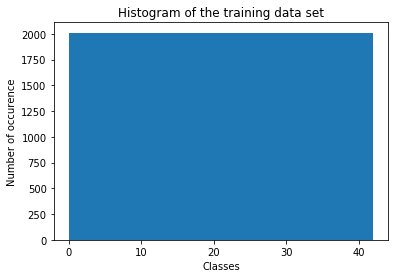

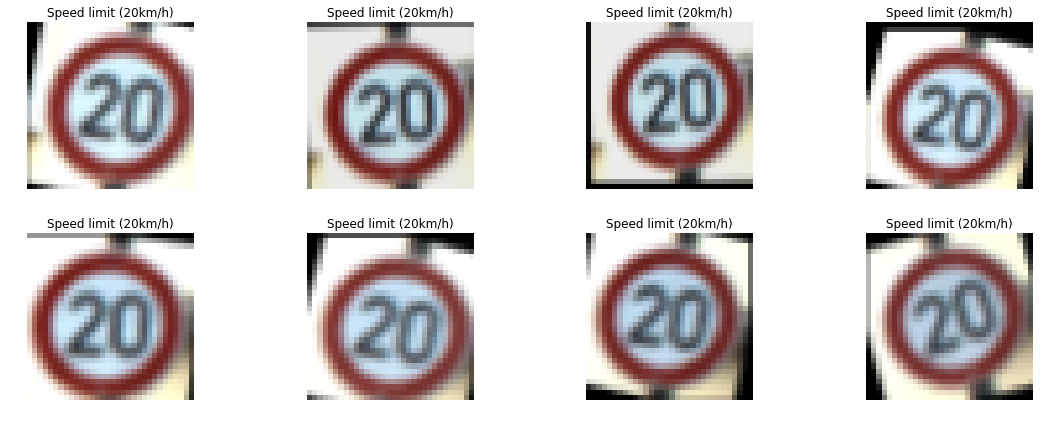

In [25]:
# Visualization
show_training_dataset_histogram(y_train)
show_sample(X_train, y_train, histogram = 0, sample_num = 8, sample_index = 35000)

## 6. Pre-process functions

In [26]:
import cv2
from numpy import newaxis

def equalize_Y_histogram(features):
    images = []
    for image in features:
        
        # Convert RGB to YUV
        temp = cv2.cvtColor(image, cv2.COLOR_BGR2YUV);

        # Equalize Y histogram in order to get better contrast accross the dataset
        temp[:,:,0] = cv2.equalizeHist(temp[:,:,0])
        
        # Convert back YUV to RGB
        temp = cv2.cvtColor(temp, cv2.COLOR_YUV2BGR)
        
        images.append(temp)

    return np.array(images)

def convert_to_grayscale(features):
    gray_images = []
    for image in features:
       
        # Convert RGB to grayscale
        temp = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        
        gray_images.append(temp)

    return np.array(gray_images)    

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    a = 0.1
    b = 0.9
    
    image_data_norm = a + ((image_data - np.amin(image_data))*(b-a))/(np.amax(image_data) - np.amin(image_data))
    
    return image_data_norm


## 7. Show a sample of the preprocess functions outputs

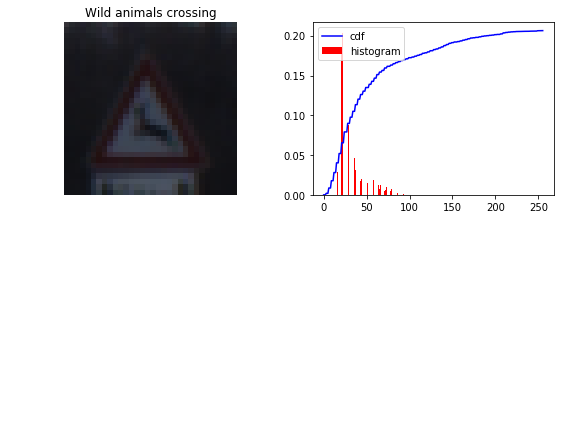

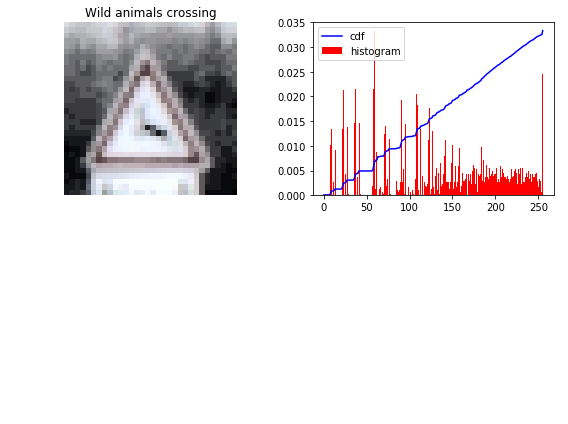

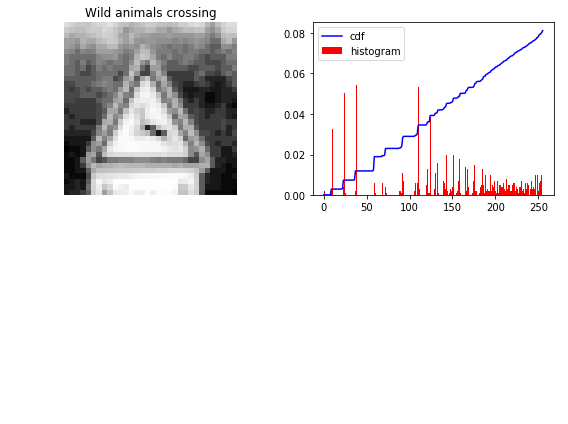

[[221 209 199 ..., 211 221 220]
 [204 195 188 ..., 202 212 213]
 [185 168 177 ..., 186 191 188]
 ..., 
 [ 10  24  38 ...,  10  10  10]
 [ 24  24  38 ...,  10  10   9]
 [ 24  38  38 ...,  10  10   1]]
[[ 0.79333333  0.75568627  0.72431373 ...,  0.76196078  0.79333333
   0.79019608]
 [ 0.74        0.71176471  0.68980392 ...,  0.73372549  0.76509804
   0.76823529]
 [ 0.68039216  0.62705882  0.65529412 ...,  0.68352941  0.69921569
   0.68980392]
 ..., 
 [ 0.13137255  0.17529412  0.21921569 ...,  0.13137255  0.13137255
   0.13137255]
 [ 0.17529412  0.17529412  0.21921569 ...,  0.13137255  0.13137255
   0.12823529]
 [ 0.17529412  0.21921569  0.21921569 ...,  0.13137255  0.13137255
   0.10313725]]


In [27]:
index = 255

X_temp1 = equalize_Y_histogram(X_train)
X_temp2 = convert_to_grayscale(X_temp1)
X_temp3 = normalize_grayscale(X_temp2)

show_sample(X_train, y_train, histogram = 1, sample_num = 1, sample_index = index)
show_sample(X_temp1, y_train, histogram = 1, sample_num = 1, sample_index = index)
show_sample(X_temp2, y_train, histogram = 1, sample_num = 1, sample_index = index, color_map ='gray')
print(X_temp2[index])
print(X_temp3[index])

## 8. Preprocess the Dataset

In [28]:
#Preprocessing pipeline
print('Preprocessing training features...')
X_train = equalize_Y_histogram(X_train)
X_train = convert_to_grayscale(X_train)
X_train = normalize_grayscale(X_train)
X_train = X_train[..., newaxis]

print("Processed shape =", X_train.shape)

print('Preprocessing validation features...')
X_valid = equalize_Y_histogram(X_valid)
X_valid = convert_to_grayscale(X_valid)
X_valid = normalize_grayscale(X_valid)
X_valid = X_valid[..., newaxis]

print("Processed shape =", X_valid.shape)

print('Preprocessing test features...')
X_test = equalize_Y_histogram(X_test)
X_test = convert_to_grayscale(X_test)
X_test = normalize_grayscale(X_test)
X_test = X_test[..., newaxis]

print("Processed shape =", X_test.shape)

# Shuffle the training dataset
X_train, y_train = shuffle(X_train, y_train)

print("Pre-processing done!")

Preprocessing training features...
Processed shape = (86430, 32, 32, 1)
Preprocessing validation features...
Processed shape = (4410, 32, 32, 1)
Preprocessing test features...
Processed shape = (12630, 32, 32, 1)
Pre-processing done!


## 9. Model Architecture

[//]: # (Image References)
[image1]: ./examples/architecture.png "Conv Net Architecture"

![alt text][image1]

| Layer         |     Description	        					|  Input            |  Output                     |
|:-------------:|:---------------------------------------------:|:-----------------:|:---------------------------:| 
| Input         | 32x32x1 Grayscale image   					| Image             | Convolution 1               |
| Convolution 1 | 1x1 stride, valid padding, outputs 28x28x100 	| Input             | RELU                        |
| RELU 1		|												| Convolution 1     | Max Pooling 1               |
| Max pooling 1	| 2x2 stride,  outputs 14x14x100 				| RELU 1            | Convolution 2, Max Pooling 3|
| Convolution 2 | 1x1 stride, valid padding, outputs 10x10x200	| Max pooling 1     | RELU 2                      |
| RELU 2		|												| Convolution 2     | Max pooling 2               |
| Max pooling 2	| 2x2 stride,  outputs 5x5x200  				| RELU 2	        | Flatten 2                   |
| Max pooling 3	| 2x2 stride,  outputs 7x7x100   				| Max pooling 1     | Flatten 1                   |
| Flatten 1		| Input = 7x7x100, Output = 4900                | Max pooling 3     | Concatenate 1               |
| Flatten 2		| Input = 5x5x200, Output = 5000                | Max pooling 2     | Concatenate 1               |
| Concatenate 1 | Input1 = 4900, Input1 = 5000, Output = 9900   | Max pooling 2 and 3 |Fully connected            |
| Fully connected | Fully Connected. Input = 9900, Output = 100 | Concatenate 1     | Dropout                     |
| Dropout       | Keep prob = 0.75                           | Fully connected   | Softmax                     |
| Softmax		| Fully Connected. Input = 100, Output = 43     | Dropout           | Probabilities               |

In [29]:
import tensorflow as tf

from tensorflow.contrib.layers import flatten

def model(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Network Parameters
    n_classes = 43  # MNIST total classes (0-9 digits)
    filter_size = 5
    

    # Store layers weight & bias
    weights = {
        'wc1' : tf.Variable(tf.truncated_normal([filter_size, filter_size, 1, 100], mean = mu, stddev = sigma)),
        'wc2' : tf.Variable(tf.truncated_normal([filter_size, filter_size, 100, 200], mean = mu, stddev = sigma)),
        'wfc1': tf.Variable(tf.truncated_normal([9900, 100], mean = mu, stddev = sigma)),
        'out' : tf.Variable(tf.truncated_normal([100, n_classes], mean = mu, stddev = sigma))}

    biases = {
        'bc1' : tf.Variable(tf.zeros([100])),
        'bc2' : tf.Variable(tf.zeros([200])),
        'bfc1': tf.Variable(tf.zeros([100])),
        'out' : tf.Variable(tf.zeros([n_classes]))}


    def conv2d(x, W, b, strides=1., padding='SAME'):
        x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
        x = tf.nn.bias_add(x, b)
        return tf.nn.relu(x)

    def maxpool2d(x, k=2, padding='SAME'):
        return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding=padding)

    # Layer 1: Convolution 1 - 32*32*1 to 28*28*100
    conv1 = conv2d(x, weights['wc1'], biases['bc1'], padding='VALID')
    # Max Pool - 28*28*100 to 14*14*100
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2: Convolution 2 - 14*14*100 to 10*10*200
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'], padding='VALID')
    # Max Pool - 10*10*200 to 5*5*200
    conv2 = maxpool2d(conv2, k=2)
    
    #Fork second max pool - 14*14*100 to 7*7*100
    conv1 = maxpool2d(conv1, k=2)
    
    #Flatten conv1. Input = 7*7*100, Output = 4900
    conv1 = tf.contrib.layers.flatten(conv1)

    # Flatten conv2. Input = 5x5x200. Output = 5000.
    conv2 = tf.contrib.layers.flatten(conv2)
    
    # Concatenate
    flat = tf.concat(1,[conv1,conv2])
    
    # Layer 3 : Fully Connected. Input = 9900. Output = 100.
    fc1 = tf.add(tf.matmul(flat, weights['wfc1']), biases['bfc1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # Layer 4: Fully Connected. Input = 100. Output = 43.
    logits = tf.add(tf.matmul(fc1, weights['out']), biases['out'])

    return logits


## 10. Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [30]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

#Hyperparameters
EPOCHS = 100                   #Max EPOCH number, if ever early stopping doesn't kick in
BATCH_SIZE = 256               #Max batch size
rate = 0.001                   #Base learning rate
keep_probability = 0.75        #Keep probability for dropout..
max_iter_wo_improvmnt = 3000   #For early stopping

## 11. Features and Labels

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [31]:
#Declare placeholder tensors
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)


## 12. Training Pipeline
Create a training pipeline that uses the model to classify German Traffic Sign Benchmarks data.

In [32]:
logits = model(x, keep_prob)
probabilities = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## 13. Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [33]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## 14. Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [36]:
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    # Max iteration number without improvement
    max_interation_num_wo_improv = 1000
    
    print("Training...")
    iteration = 0
    best_valid_accuracy = 0
    best_accuracy_iter = 0
    stop = 0
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            iteration = iteration + 1
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_probability})
            
            # After 10 Epochs, for every 200 iterations validation accuracy is checked
            if (iteration % 200 == 0 and i > 10):
                validation_accuracy = evaluate(X_valid, y_valid)
                
                if validation_accuracy > best_valid_accuracy:
                    best_valid_accuracy = validation_accuracy
                    best_accuracy_iter = iteration
                    saver = tf.train.Saver()
                    saver.save(sess, './best_model')
                    print("Improvement found, model saved!")
                    stop = 0
                
                # Stopping criteria : if not improvement since 1000 iterations stop training
                if (iteration - best_accuracy_iter) > max_iter_wo_improvmnt:
                    print("Stopping criteria met..")
                    stop = 1
                    
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
        if stop == 1:
            break
        
#     saver.save(sess, './lenet')
#     print("Model saved")

Training...



KeyboardInterrupt: 

## 15. Evaluate accuracy of the different data sets

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    print("Evaluating..")
    train_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    valid_accuracy = evaluate(X_valid, y_valid)
    print("Valid Accuracy = {:.3f}".format(valid_accuracy))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))



---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

## 16. Load and Show the Images

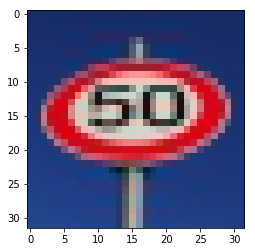

Loaded  50kph.jpg


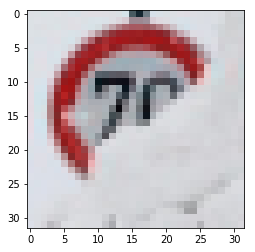

Loaded  70kphCovered.jpg


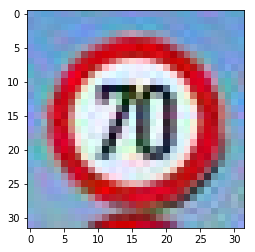

Loaded  limit70.jpg


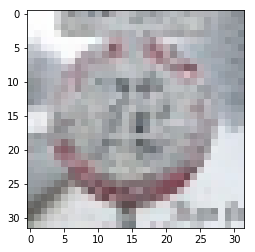

Loaded  70kphSnow.jpg


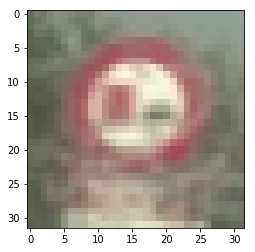

Loaded  NoPassingForVehiclesOver3.5metricTons.jpg


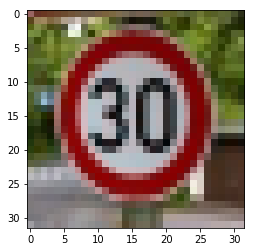

Loaded  limit30.jpg


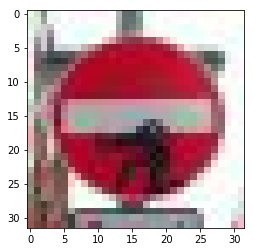

Loaded  NoEntry.jpg


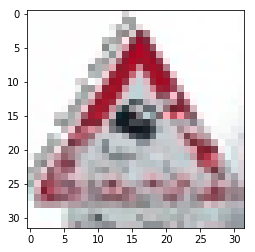

Loaded  SlipperyRoad.jpg


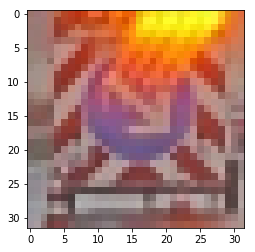

Loaded  KeepRight.jpg


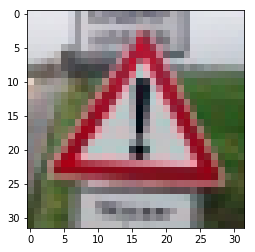

Loaded  Generalcaution.jpg


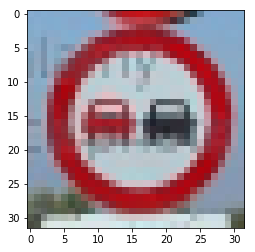

Loaded  nopassing.jpg


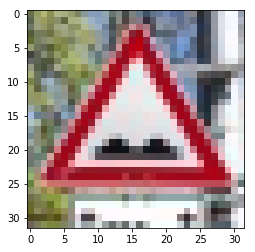

Loaded  bumpyroad.jpg


In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

test_images = os.listdir('traffic-signs-data/web_found_signs/')

X_web = []

for file in test_images:

    image = mpimg.imread('traffic-signs-data/web_found_signs/' + file)   
    
    plt.imshow(image)
    plt.show()
    print("Loaded ", file)

    X_web.append(image)

X_web = np.array(X_web)


## 17. Predict the Sign Type for Each Image

Preprocessing features...
Processed shape = (12, 32, 32, 1)
Prediction = [ 7 13  7  1 20 20  1  7 13  1  7  1]


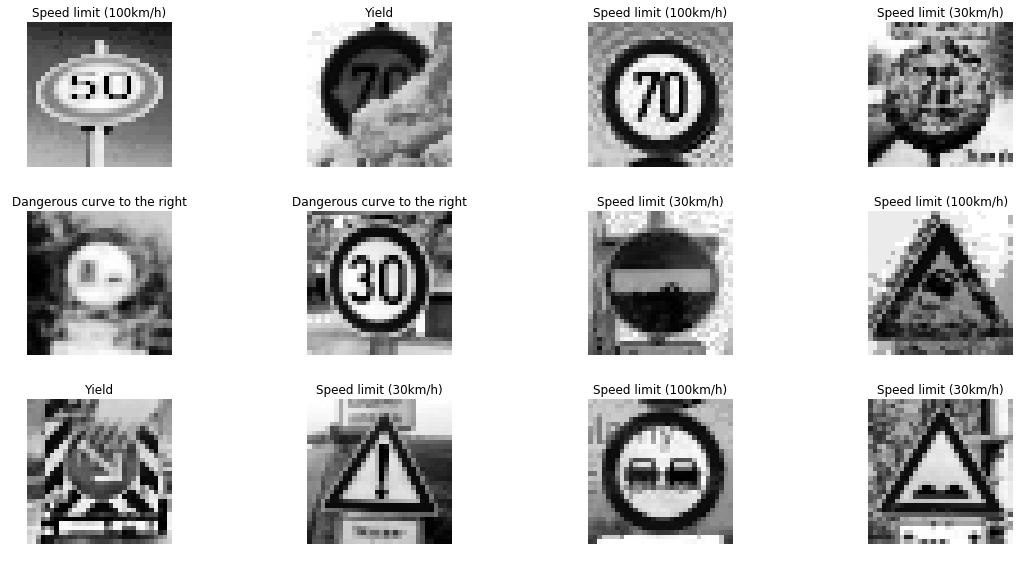

In [35]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
import tensorflow as tf

# Preprocess images
print('Preprocessing features...')
X_web = equalize_Y_histogram(X_web)
X_web = convert_to_grayscale(X_web)
X_web = normalize_grayscale(X_web)
X_web = X_web[..., newaxis]

print("Processed shape =", X_web.shape)

y_web = []

#We have to set the keep probability to 1.0 in the model..
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    logits_web = sess.run(tf.argmax(logits,1), feed_dict={x: X_web, keep_prob: 1.0})
    
print("Prediction =", logits_web)
    
show_sample(X_web, logits_web, histogram = 0, sample_num = len(test_images), sample_index = 0, color_map = 'gray')

## 18. Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 

y_web = [2,4,4,4,10,1,17,23,38,18,10,22]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_web, y_web)
    print("Web images Accuracy = {:.3f}".format(test_accuracy))


## 19. Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

import matplotlib.gridspec as gridspec

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    softmax_prob = sess.run(tf.nn.top_k(probabilities,k = 5), feed_dict={x: X_web, keep_prob: 1.0})

print(softmax_prob)
    
signnames = pd.read_csv('signnames.csv')

for i in range(len(test_images)):
    plt.figure(figsize = (6,2))
    gs = gridspec.GridSpec(1, 2,width_ratios=[2,3])
    plt.subplot(gs[0])
    plt.imshow(X_web[i].squeeze(),cmap="gray")
    plt.axis('off')
    plt.subplot(gs[1])
    plt.barh(6-np.arange(5),softmax_prob[0][i], align='center')
    for i_label in range(5):
        plt.text(softmax_prob[0][i][0]*1.1,6-i_label-.15, signnames.iloc[softmax_prob[1][i][i_label], 1])
    plt.show()
    

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 